In [1]:
# Ensure library compatibility by upgrading numpy and scikit-learn
!pip install -U numpy scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


# 머신러닝 , 데이터에서 규칙을 찾고 , 학습하고, 결과를 예측하는 분석 방법.
## 인공지능의 한 분야. 
## 2가지의 학습 방법
### 1) 지도 학습(답지 있음), 예) 통계자료가 있다. 집가 예측, 의료기관수, 암 진단등. 결과에 대한 답이있다.  타겟, 라벨이있다. -> 정확도가 높다.
### 2) 비지도 학습(답지없음.) -> 데이터를 수집 -> 정확도가 낮다. 

### 해결하는 주요 문제 1) 회귀 2) 분류 3) 군집 
### 사이킷런의 모듈을 이용해서, 위의 머신러닝 테스트를 진행할 예정. 
### 논문, 트위터, 유튜브, 깃허브 등을 이용해서, 관련 자료를 많이 수집함. GPT도 많이 사용함. 

### 레스트 서버를 구축시, 파이썬에 과학에 관련된 라이브러리가 많다보니, 
### 파이썬 관련 서비스를 제공하는 REST API를 따로 만들기도 함. 
### Django 장고(파이썬 기반의 웹 프레임워크), flask , FAST API , 전부다 파이썬 기반.  

### 앞단(기본적인 웹, 리액트, 안드로이드 앱)
### 뒷단( 스프링, 노드js , 장고,플라스크,fast API, 파이어베이스 등, 네이버, 카카오, 구글 API들.. )

## 답이 있는 데이터, 지도 학습. 
## 주택 가격 예측

## 자동차 연비 예측 

## 샘플 데이터는, 사이킷런에 내장된 데이터, 보스톤 집값을 사용하면 됩니다. 
### 버전이 변경이 되어서, 데이터를 받으려면, 버전 맞춰주는 작업이 필요. 

### 일반 프로그램 진행방식, 머신러닝 진행 방식 
### 일반 프로그램 진행방식 
### 입력값(X)        --> 일반프로그램(예)함수) --> 결괏값(Y)
### 새로운 입력값(X) --> 일반프로그램(예)함수) --> 새로운 결괏값(Y)

### 머신러닝 진행 방식 
### 입력값(X)        --> ML 프로그램(예)함수) --> 학습모델 --> 결괏값(Y)
### 새로운 입력값(X) -->  학습 모델 -> 새로운 출력값(Y)= 예측값, 

### 머신러닝 프로세스 
### 1) 데이터 수집 -> 2) 데이터 전처리 및 학습/테스트 분할 3) 모델 구축 및 학습 4) 모델 평가 5) 예측
### 예) 이상용 , 수학 모의고사 준비
### 문제집 문제가 100문제,중에서, 70문제 학습 / 30문제 테스트 
### 이상용 공부(학습)-> 70문제로 학습,  / 30문제 테스트 평가, 10문제 맞혔다, 학습이 잘되었다? 못되었다?o 
### 이상용 공부(학습)-> 70문제로 학습,  / 30문제 테스트 평가, 25문제 맞혔다, 학습이 잘되었다?o 못되었다? 
###

### 분석 평가 지표 
### 오류 부분의 지표가 낮을수록 좋다.
### MAE: Mean Absolute Error : 오류의 절댓값 평균
### MSE: Mean Squared Error : 오류의 제곱 평균
### RMSE: Root Mean Squared Error : 오류의 제곱 평균의 제곱근 ex) 4 , 4 의 제곱근 : 2

### 값이 클수록, 실제값에 가깝다.
### R^2 : Variance Score : 결정계수, 예측값의 분산 / 실제값의 분산으로 나눈 비율

In [2]:
import pandas as pd
import numpy as np

# The Boston housing dataset is no longer available in scikit-learn since version 1.2.
# We are loading it from a reliable online source (the original StatLib repository at CMU).
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# The feature names are based on the dataset description.
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df["PRICE"] = target

print("Boston dataset loaded successfully from external source.")
boston_df.head()

Boston dataset loaded successfully from external source.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# This cell is no longer needed as the DataFrame is created in the cell above.


In [4]:
# This cell is no longer needed as the 'PRICE' column is already included in the loaded DataFrame.


In [5]:
# 보스턴 집값 관련 데이터 몇개 인지? shape 속성
print(f"보스턴 집값의 행 열 : {boston_df.shape}")

보스턴 집값의 행 열 : (506, 14)


In [6]:
# 기본 정보 조회 : info()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 각 컬럼의 정보
### CRIM : 지역별 CRIM 발생률
### ZN : 25,000 평방피트를 초과하는 거주 비율 
### INDUS : 비상업 지역의 넓이의 비율 
### CHAS : 찰스강의 더미 변수 (1은 강의 경계, 0은 경계 아님.)
### NOX : 일산화질소 농도 
### RM : 거주할수 있는 방 갯수 
### AGE : 1940년도 이전에 건축된 주택 비율 
### DIS : 5개 주요 고용센터까지 가중 거리 
### RAD : 고속도로 접근 용이도 
### TAX : 10,000 달러당 재산세 비율 
### PTRATIO : 지역의 교사와 학생 비율 
### B : 지역의 흑인 거주 비율 
### LSTAT : 하위 계층 비율 
### PRICE : 본인 소유 주택 가격의 중앙값 

In [7]:
# 선형(직선) 회귀분석을 이용해서 , 분석 모델을 구축 
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용 데이터 분리해주기. 
from sklearn.model_selection import train_test_split
# 분석 평가지수, MSE(오류의 제곱 평균: 낮을수록 좋다. 모델의 예측값이, 실제값과 거의 비슷. )
# R^2, : 예측값 / 실제값 , 나눈 비율. 클수록 좋다. 모델의 예측값이, 실제값과 거의 비슷. 
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# X, Y 분할, 독립변수, 종속 변수를 나누는 작업. 
Y = boston_df["PRICE"]
# PRICE 를 제외한 나머지 변수를 가지고 오기. 
# axis= 1 -> 열 기준, 
# inplace= False : 원본에 영향을 주지 않겠다. 
X = boston_df.drop(["PRICE"], axis= 1 , inplace= False)

In [9]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업. 
# test_size=0.3 비율 , 학습 데이터 : 70%, 평가 데이터 : 30%
# random_state=156 -> 동일한 방식으로 데이터 분할. 
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=156)

In [10]:
print(f"X_train : {X_train.shape},X_test : {X_test.shape},Y_train : {Y_train.shape},Y_test : {Y_test.shape}")

X_train : (354, 13),X_test : (152, 13),Y_train : (354,),Y_test : (152,)


In [11]:
# 선형 회귀 분석 이용해서, 모델 생성 
lr = LinearRegression()

In [12]:
# 모델을 이용해서, 훈련하기. 모델 학습시키기
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# 학습된 모델을 이용해서, 평가하기, 예측값을 이용해서, 실제값과 비교하기. 
# 예) 상용이가 70문제로 학습한 모델을, 테스트 확인 하는 작업,
# 예) 30문제로 평가하기. 예측값 구하기. 
y_predict = lr.predict(X_test)

In [14]:
# 평가 분석 지표 
# MSE : 오류의 제곱 평균
# R^2 Score :  예측값 / 실제값 나눈비율 
#Y_test : 답지, y_predict : 상용이가 학습해서, 시험친 결과 
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2, 값을 통일 시켰다. 나중에, 스케일링을 많이 함, 정규화등으로 고쳐야, 
# 통계시, 효율적으로 작업이 진행되므로, 그래서, 이런 작업을 많이 함. 
rmse = np.sqrt(mse)

r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")

mse : 17.296915907902093, rmse : 4.158956107955708 ,r2_value : 0.757226332313893


In [15]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
# CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE
# 독립변수의 계수값 
print(f"회귀 계수의 값 : {np.round(lr.coef_,1)}")


Y 절편의 값 : 40.995595172164506
회귀 계수의 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
# CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE 값 정리
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

# 직선 -> y = ax + b
# Y (price) = -0.11 x X(CRIM) + 0.03 x X(INDUS) + ....
# 계수들은, 모델의 성능을 최적화 할 때, 사용이 되는 하이퍼 매개변수, 웨이트 값(비중값)
# 비중값들의 여러 환경적인 요인에 의해서 조정이 됩니다. 
# 예를들어 , 딥러닝 -> 다층 신경망 사이사이에, 손실함수, 활성화함수, 정규화 등 이용해서, 
# 최적의 비중값을 찾아가는 과정. -> 모델을 성능을 최적화하는 과정. 
# 

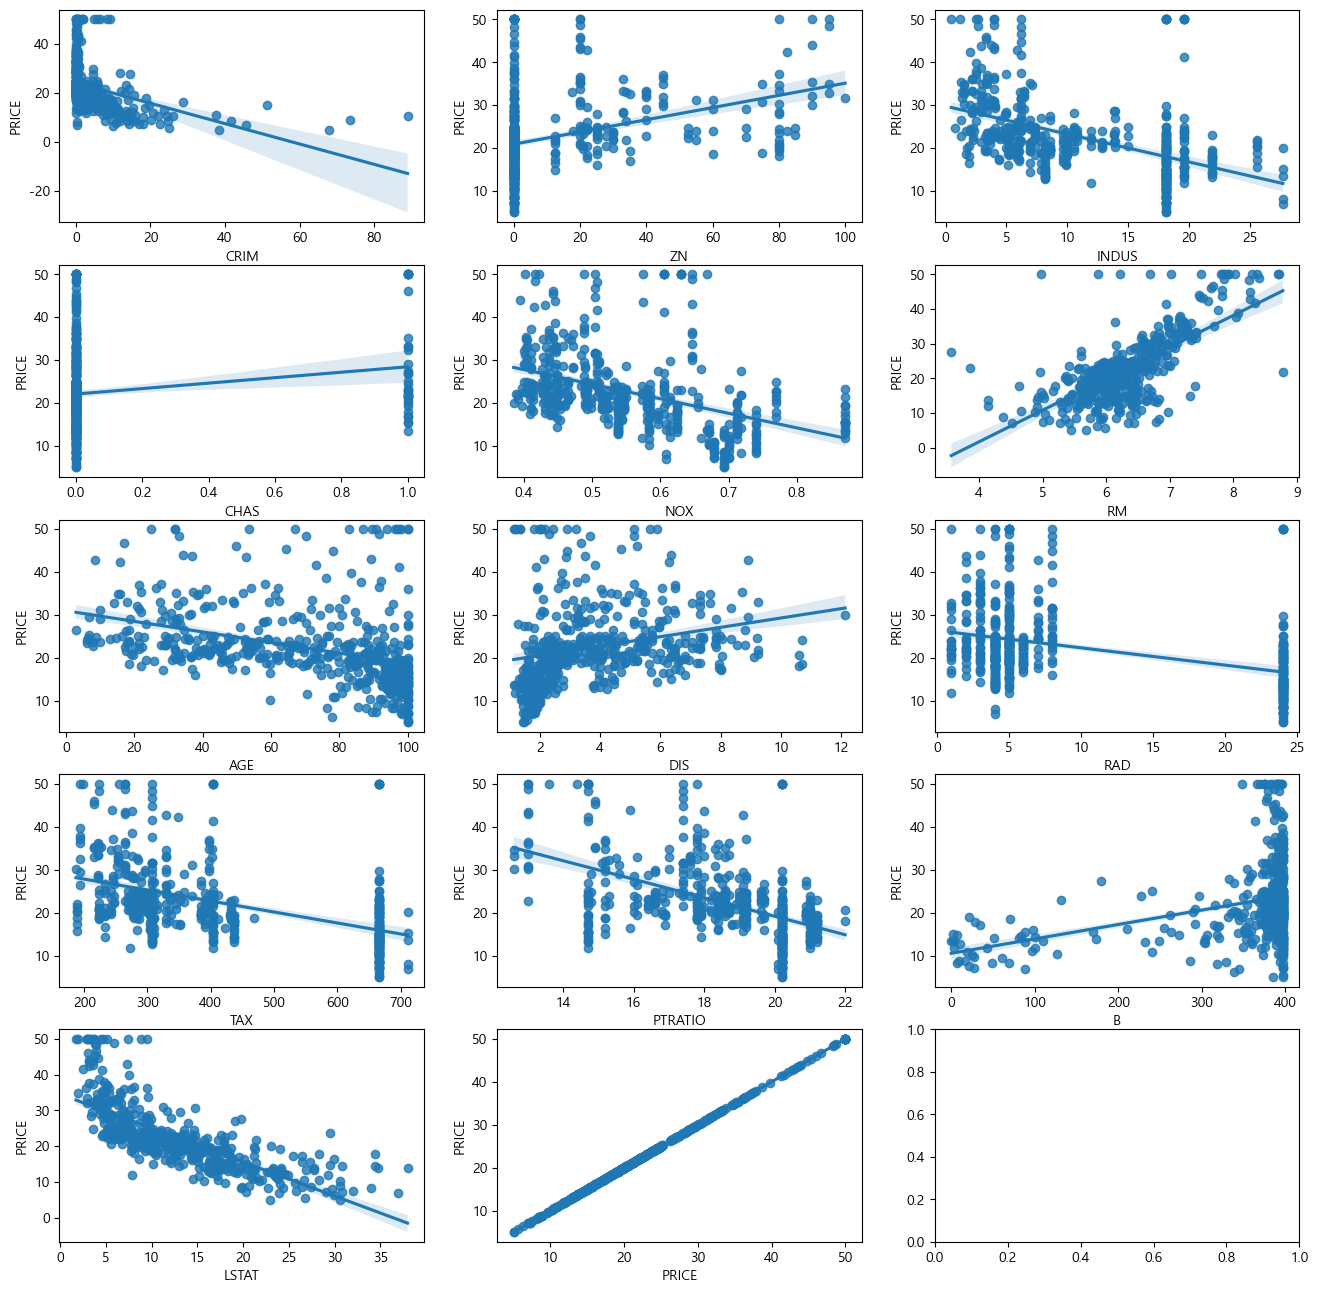

In [17]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표 
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사. 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
plt.rcParams['axes.unicode_minus'] = False

# 이미지들을 , 5 x 3 , 표 형태로 나타내기. 
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 5)

x_features = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B",	"LSTAT",	"PRICE"]

for i, feature in enumerate(x_features):
  # 몫 -> 5개 행으로 
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="PRICE", data = boston_df, ax = axs[row][col])